## **Heart Attack**

# **Importing the Dependencies/Libraries**

In [88]:
import numpy as np            # Matrix Multiplication
import pandas as pd           # Loading Dataset/ read file
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error

# **Data collection and processing**

In [89]:
# loading the csv data to a pandas DataFrame
Heart_data = pd.read_csv('/content/sample_data/heart.csv')

In [90]:
Heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0




1. **age** in years
2. **sex**: sex (1 = male; 0 = female)
3. **cp:** chest pain type
4. **trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
5. **chol:** serum cholestoral in mg/dl
6. **fbs:** (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. **restecg:** resting electrocardiographic results
8. **thalach:** maximum heart rate achieved
9. **exang:** exercise induced angina (1 = yes; 0 = no)
10. **oldpeak:** ST depression induced by exercise relative to rest
11. **slope:** the slope of the peak exercise ST segment
12. **ca:** number of major vessels (0-3) colored by flourosopy
13. **Target:** diagnosis of heart disease

In [91]:
# Number of rows and columns in the dataset
Heart_data.shape

(1025, 14)

In [92]:
print("Number of Rows", Heart_data.shape[0])
print("Number of Columns", Heart_data.shape[1])

Number of Rows 1025
Number of Columns 14


In [93]:
# getting some info about our data
Heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [94]:
# Checking for missing values
Heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [95]:
# Statistical measures about the data
Heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Correlation Matrix**

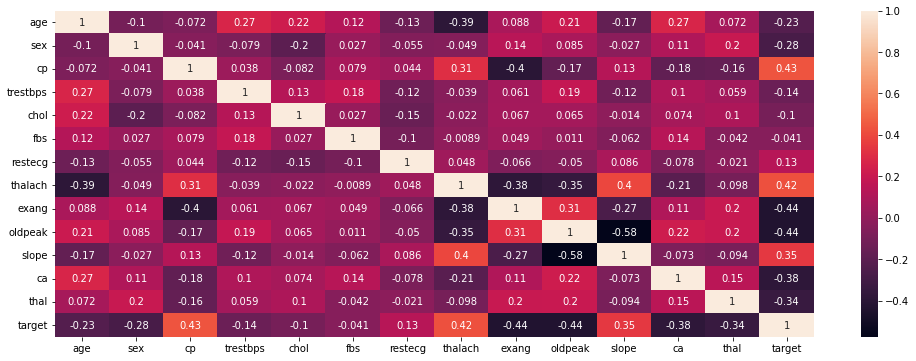

In [96]:
 plt.figure(figsize=(17,6))
 sns.heatmap(Heart_data.corr(), annot = True)

# **Data Analysis**

**I answered likely questions that may be could be for better understanding of our Heart Disease Dataset.**

In [97]:
Heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## **How many People have Heart Disease, and how many Don't Have Heart Diease in this Dataset?**

In [98]:
# Checking the distribution of Target Variable
Heart_data['target'].value_counts()

# 0 means no disease
# 1 means with Heart disease

1    526
0    499
Name: target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


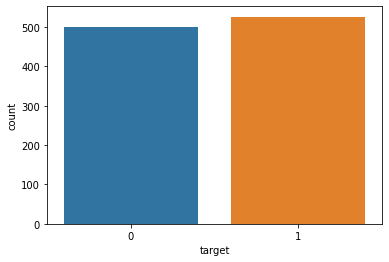

In [99]:
sns.countplot(Heart_data['target'])

## **Finding number of Male & Female in the Heart Disease dataset**

In [100]:
Heart_data['sex'].value_counts()
# sex (1 = male; 0 = female)

1    713
0    312
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


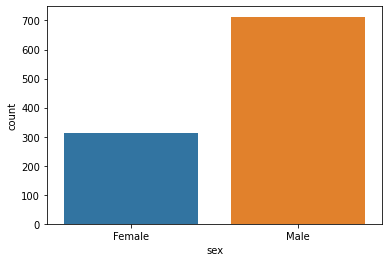

In [101]:
sns.countplot(Heart_data['sex'])
plt.xticks([0,1],['Female', 'Male'])
plt.show()

## **Check Age Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


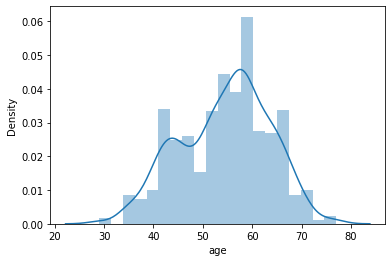

In [102]:
sns.distplot(Heart_data['age'], bins=20)
plt.show()

### **Check chest Pain Types**

**Chest pain type (4 values)**

*   Value 0: typical angina
*   Value 1: atypical angina
*   Value 2: non-anginal pain
*   Value 3: asymptomatic





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


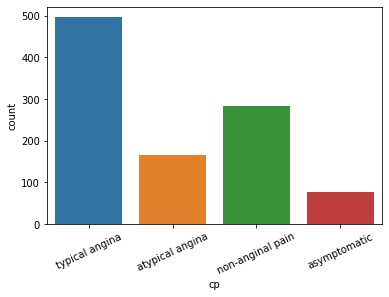

In [103]:
sns.countplot(Heart_data['cp'])
plt.xticks([0,1,2,3], ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"])
plt.xticks(rotation=25)
plt.show()

## **Check Resting Blood Pressure Distribution**

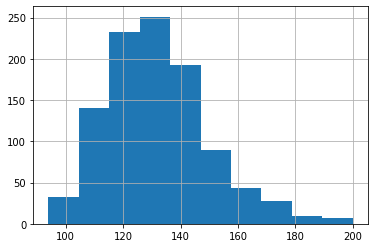

In [104]:
Heart_data['trestbps'].hist()

## **Compare Resting Blood Pressure As Per Sex Column**

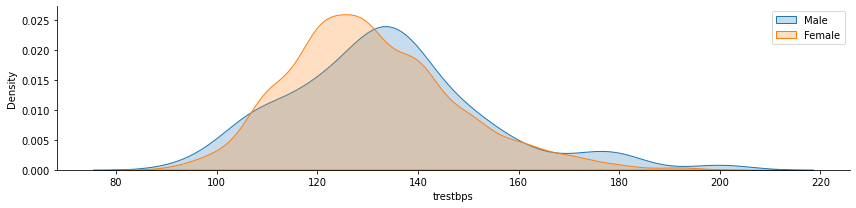

In [105]:
g = sns.FacetGrid(Heart_data, hue="sex", aspect=4)
g.map(sns.kdeplot, 'trestbps', shade=True)
plt.legend(labels=['Male','Female'])

## **Showing Distribution of Serum cholesterol**

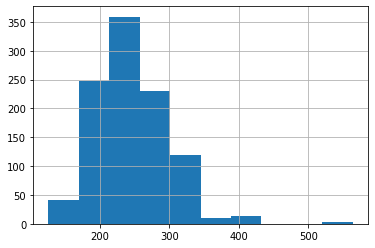

In [106]:
Heart_data['chol'].hist()

## **Plotting Continuous Variables**

In [107]:
Heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [108]:
X_val=[] # contains categorical values
Y_val=[] # contains continous values

for column in Heart_data.columns:
  if Heart_data[column].nunique() <= 10:
    X_val.append(column)
  else:
    Y_val.append(column)

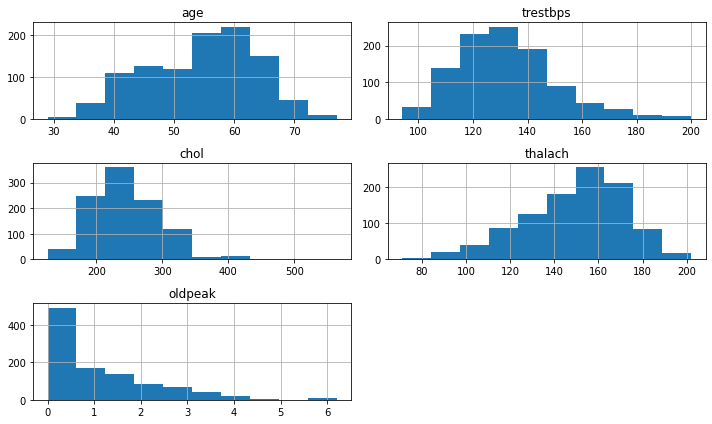

In [109]:
  Heart_data.hist(Y_val, figsize=(10,6))
  plt.tight_layout()
  plt.show()

# **Machine Learning Algorithm**

## **Splitting the features and Target**

In [110]:
X = Heart_data.drop(columns = 'target', axis = 1)
Y = Heart_data['target']

## **Splitting the data into training and Testing Data**

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 2)

## **Model Training**

**Logistic Regression Model**

In [131]:
model = LogisticRegression()
# training the LogisticRegression Model with Training Data
model.fit(X_train, Y_train)

#**Model Evaluation**
#Accuracy Score

# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# accuracy on test data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Training data: ', training_data_accuracy*100)
print('Accuracy on Testing data: ', testing_data_accuracy*100)
print('Mean Squared Error: ', mean_squared_error(X_test_prediction, Y_test))

Accuracy on Training data:  85.24390243902438
Accuracy on Testing data:  80.48780487804879
Mean Squared Error:  0.1951219512195122


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## **Support Vector Machine Model**

In [132]:
SVM_model = SVC()
# training the Support Vector Machine Model with Training Data
SVM_model.fit(X_train, Y_train)


#**Model Evaluation**
#Accuracy Score

# accuracy on training data
X_train_prediction = SVM_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# accuracy on test data
X_test_prediction = SVM_model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Training data: ', training_data_accuracy*100)
print('Accuracy on Testing data: ', testing_data_accuracy*100)

print('Mean Squared Error: ', mean_squared_error(X_test_prediction, Y_test))


Accuracy on Training data:  72.07317073170731
Accuracy on Testing data:  70.73170731707317
Mean Squared Error:  0.2926829268292683


## **K Neighbors Model**

In [133]:
Knn_model = KNeighborsClassifier()
# training the K Neighbors Model with Training Data
Knn_model.fit(X_train, Y_train)


#**Model Evaluation**
#Accuracy Score

# accuracy on training data
X_train_prediction = Knn_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

# accuracy on test data
X_test_prediction = Knn_model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Training data: ', training_data_accuracy*100)
print('Accuracy on Testing data: ', testing_data_accuracy*100)

print('Mean Squared Error: ', mean_squared_error(X_test_prediction, Y_test))


Accuracy on Training data:  90.60975609756098
Accuracy on Testing data:  72.1951219512195
Mean Squared Error:  0.2780487804878049


# **Building a Predicting System**

In [134]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)


# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have a Heart Disease')
else:
  print('The person has Heart Disease')

[1]
The person has Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [135]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have a Heart Disease')
else:
  print('The person has Heart Disease')

[0]
The person does not have a Heart Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [136]:
confusion_matrix = confusion_matrix(X_test_prediction, Y_test)
print(confusion_matrix)

[[74 31]
 [26 74]]


In [137]:
print(classification_report(X_train_prediction, Y_train))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       412
           1       0.89      0.92      0.91       408

    accuracy                           0.91       820
   macro avg       0.91      0.91      0.91       820
weighted avg       0.91      0.91      0.91       820



# **Saving the trained model**

In [138]:
import pickle

In [139]:
filename = 'heart_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [140]:
# loading the saved model
loaded_model = pickle.load(open('heart_model.sav', 'rb'))